In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.colors import colorConverter

In [2]:
def draw_geometry(axs, rp, rm, xp, yp, xm, ym):
    
    star = plt.Circle((0, 0), 1, color='#ffae36', alpha=0.75)
    star_outline = plt.Circle((0, 0), 1, color=colorConverter.to_rgba('w', alpha=0.0), ec='k')
    
    planet = plt.Circle((xp, yp), rp, color=colorConverter.to_rgba('r', alpha=0.5), ec='k')
    planet_base = plt.Circle((xp, yp), rp, color='w')
    moon = plt.Circle((xm, ym), rm, color=colorConverter.to_rgba('b', alpha=0.5), ec='k')
    moon_base = plt.Circle((xm, ym), rm, color='w')
    
    axs.add_patch(star)
    axs.add_patch(planet_base)
    axs.add_patch(moon_base)
    axs.add_patch(star_outline)
    
    axs.add_patch(planet)
    axs.add_patch(moon)

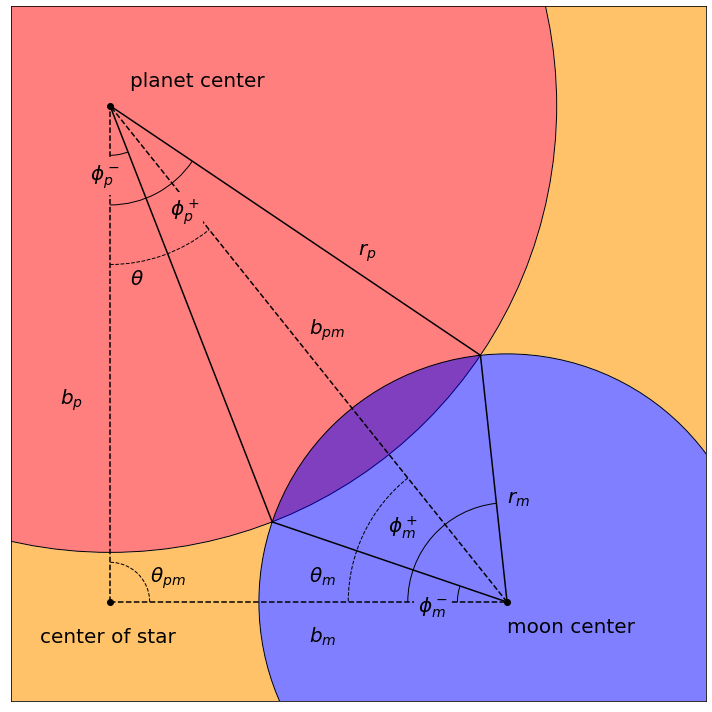

In [247]:
plt.figure(figsize=(10, 10))
plt.ylim(-0.1, 0.6)
plt.xlim(-0.1, 0.6)
ax = plt.gca()

xp, yp = 0.0, 0.5
xm, ym = 0.4, 0.0
rp = 0.45
rm = 0.25
bp = np.sqrt(xp*xp + yp*yp)
bm = np.sqrt(xm*xm + ym*ym)
bpm = np.sqrt((xp-xm)**2 + (yp-ym)**2)
theta = np.arctan((ym-yp)/(xm-xp))
thetam = np.arccos((bm * bm + bpm * bpm - bp * bp) / (2 * bm * bpm))
thetam0 = np.pi + np.arctan(ym/xm)

pp = np.arccos((rp * rp + bpm * bpm - rm * rm) / (2 * rp * bpm))
pm = np.arccos((rm * rm + bpm * bpm - rp * rp) / (2 * rm * bpm))

x1, y1 = xp + rp * np.cos(theta + pp), yp + rp * np.sin(theta + pp)
x2, y2 = xp + rp * np.cos(theta - pp), yp + rp * np.sin(theta - pp)

draw_geometry(ax, rp, rm, xp, yp, xm, ym)
plt.plot(0, 0, 'ko')
plt.plot(xp, yp, 'ko')
plt.plot(xm, ym, 'ko')

plt.plot((0, xp), (0, yp), 'k--')
plt.plot((0, xm), (0, ym), 'k--')
plt.plot((xm, xp), (ym, yp), 'k--')
plt.plot((xp, x1), (yp, y1), 'k')
plt.plot((xp, x2), (yp, y2), 'k')
plt.plot((xm, x1), (ym, y1), 'k')
plt.plot((xm, x2), (ym, y2), 'k')

pp1 = Arc((xp, yp), 0.2, 0.2, theta1 = -90, theta2 = 180 * (theta + pp) / np.pi)
pp2 = Arc((xp, yp), 0.1, 0.1, theta1 = -90, theta2 = 180 * (theta - pp) / np.pi)

pm1 = Arc((xm, ym), 0.1, 0.1, theta2 = 180 * thetam0 / np.pi, theta1 = 180 * (thetam0 - (thetam - pm)) / np.pi)
pm2 = Arc((xm, ym), 0.2, 0.2, theta2 = 180 * thetam0 / np.pi, theta1 = 180 * (thetam0 - (thetam + pm)) / np.pi)

theta_arc = Arc((xp, yp), 0.32, 0.32, theta1 = -90, theta2 = 180 * theta / np.pi, linestyle='--')
thetam_arc = Arc((xm, ym), 0.32, 0.32, theta2 = 180 * thetam0 / np.pi, theta1 = 180 * (thetam0 - thetam) / np.pi, linestyle='--')
thetapm_arc = Arc((0, 0), 0.08, 0.08, theta1 = 180 * np.arctan(ym/xm) / np.pi, theta2 = 90, linestyle='--')

ax.add_patch(pp1)
ax.add_patch(pp2)
ax.add_patch(pm1)
ax.add_patch(pm2)
ax.add_patch(theta_arc)
ax.add_patch(thetam_arc)
ax.add_patch(thetapm_arc)

plt.annotate("planet center", (0.02, 0.52), fontsize=20)
plt.annotate("moon center", (0.4, -0.03), fontsize=20)

backtext = plt.annotate(r"$\phi_p^+$", (0.06, 0.39), fontsize=20, bbox = {"color":'w', "alpha":1.0, "lw":0})
backtext.set_alpha(0.0)
plt.annotate(r"$\phi_p^+$", (0.06, 0.39), fontsize=20, bbox = {"color":'r', "alpha":0.5, "lw":0})

backtext = plt.annotate(r"$\phi_p^-$", (-0.02, 0.425), fontsize=20, bbox = {"color":'w', "alpha":1.0, "lw":0})
backtext.set_alpha(0.0)
plt.annotate(r"$\phi_p^-$", (-0.02, 0.425), fontsize=20, bbox = {"color":'r', "alpha":0.5, "lw":0})

backtext = plt.annotate(r"$\phi_m^-$", (0.31, -0.01), fontsize=20, bbox = {"color":'w', "alpha":1.0, "lw":0})
backtext.set_alpha(0.0)
plt.annotate(r"$\phi_m^-$", (0.31, -0.01), fontsize=20, bbox = {"color":'b', "alpha":0.5, "lw":0})

backtext = plt.annotate(r"$\phi_m^+$", (0.28, 0.07), fontsize=20, bbox = {"color":'w', "alpha":1.0, "lw":0})
backtext.set_alpha(0.0)
plt.annotate(r"$\phi_m^+$", (0.28, 0.07), fontsize=20, bbox = {"color":'b', "alpha":0.5, "lw":0})

backtext = plt.annotate(r"$\theta$", (0.02, 0.32), fontsize=20, bbox = {"color":'w', "alpha":1.0, "lw":0})
backtext.set_alpha(0.0)
plt.annotate(r"$\theta$", (0.02, 0.32), fontsize=20, bbox = {"color":'r', "alpha":0.5, "lw":0})

backtext = plt.annotate(r"$\theta_m$", (0.2, 0.02), fontsize=20, bbox = {"color":'w', "alpha":1.0, "lw":0})
backtext.set_alpha(0.0)
plt.annotate(r"$\theta_m$", (0.2, 0.02), fontsize=20, bbox = {"color":'b', "alpha":0.5, "lw":0})

plt.annotate(r"$\theta_{pm}$", (0.04, 0.02), fontsize=20)

plt.annotate(r"$b_p$", (-0.05, 0.2), fontsize=20)
plt.annotate(r"$b_m$", (0.2, -0.04), fontsize=20)
plt.annotate(r"$b_{pm}$", (0.2, 0.27), fontsize=20)
plt.annotate(r"$r_m$", (0.4, 0.1), fontsize=20)
plt.annotate(r"$r_p$", (0.25, 0.35), fontsize=20)
plt.annotate("center of star", (-0.07, -0.04), fontsize=20)

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.tight_layout()
plt.savefig("/Users/tgordon/Desktop/planet_moon_overlap.pdf")

In [106]:
180 * (theta + pm / np.pi

1.0164888305933455

In [107]:
np.arccos((bm * bm + bpm * bpm - bp * bp) / (2 * bm * bpm))

1.0164888305933455